In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
df['Sex'] = df['Sex'].replace({'F': 1, 'M': 0})

In [9]:
df['BP'] = df['BP'].replace({'LOW': 1, 'NORMAL': 2, 'HIGH': 3})

In [12]:
df['Cholesterol'] = df['Cholesterol'].replace({'NORMAL': 1, 'HIGH': 2})

In [16]:
df['Drug'] = df['Drug'].replace({
    'drugA': 'A',
    'drugB': 'B',
    'drugC': 'C',
    'drugX': 'X',
    'drugY': 'Y',
})

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns='Drug'), df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [44]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train.to_numpy(), y_train.to_numpy())

DecisionTreeClassifier()

In [46]:
tree.score(X_test.to_numpy(), y_test.to_numpy())

1.0

In [47]:
one = np.array([[40, 1, 2, 1,20]])

tree.predict(one)

array(['Y'], dtype=object)

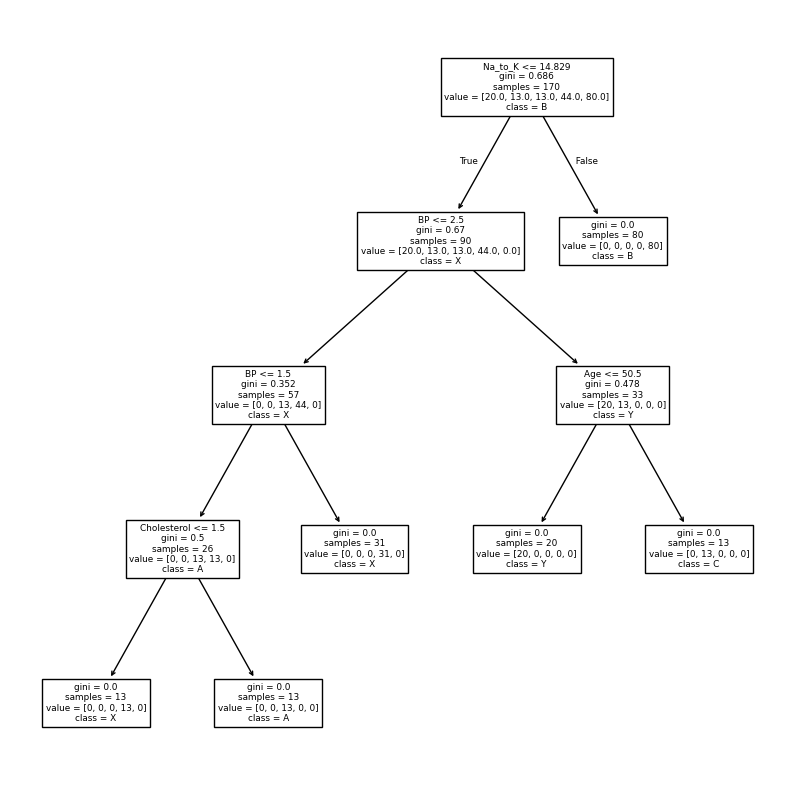

In [52]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()